<a href="https://colab.research.google.com/github/JJungEEun/2023_DaconStudy/blob/main/KBO%20%ED%83%80%EC%9E%90%20OPS%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')     

Mounted at /content/drive


In [38]:
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings(action='ignore') 

In [36]:
plt.style.use("seaborn") # 전체 그래프를 seaborn 스타일로 고정
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용


plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 20})

In [3]:
cd /content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data

/content/drive/MyDrive/2023/데이콘/KBO 타자 OPS 예측 경진대회/data


### Load Dataset

1. Regular_Season_Batter.csv : KBO에서 활약한 타자들의 역대 정규시즌 성적을 포함하여 몸무게, 키 ,생년월일 등의 기본정보

2. Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적

3. Pre_Season_Batter.csv : KBO에서 활약한 타자들의 역대 시범경기(정규시즌 직전에 여는 연습경기) 성적

4. submission.csv : 참가자들이 예측해야 할 타자의 이름과 아이디 목록

In [4]:
regular = pd.read_csv('Regular_Season_Batter.csv')
daybyday = pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
preseason = pd.read_csv('Pre_Season_Batter.csv')

In [5]:
# 결측치 존재
regular.isna().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

### EDA

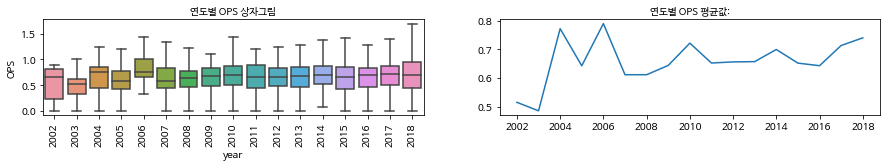

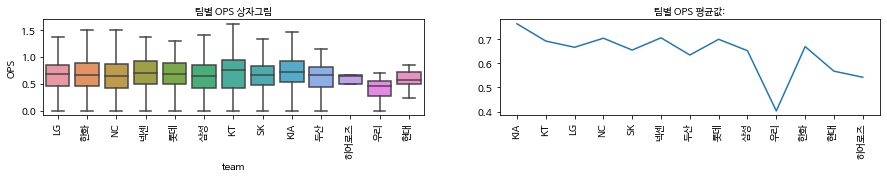

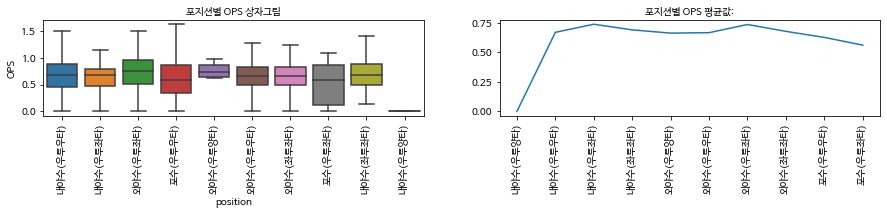

In [6]:
# 프리시즌
plt.figure(figsize=(15,6))
plt.subplot(3,2,1) 
g= sns.boxplot(x='year', y='OPS', data=preseason, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,2)
plt.plot(preseason.groupby('year')['OPS'].mean()) 
plt.title('연도별 OPS 평균값:', size=10)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(3,2,3) 
g = sns.boxplot(x='team', y='OPS', data=preseason, showfliers=False)
g.set_title('팀별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,4)
plt.plot(preseason.groupby('team')['OPS'].mean()) 
plt.title('팀별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(3,2,5) 
g = sns.boxplot(x='position', y='OPS', data=preseason, showfliers=False)
g.set_title('포지션별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,6)
plt.plot(preseason.groupby('position')['OPS'].mean()) 
plt.title('포지션별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()

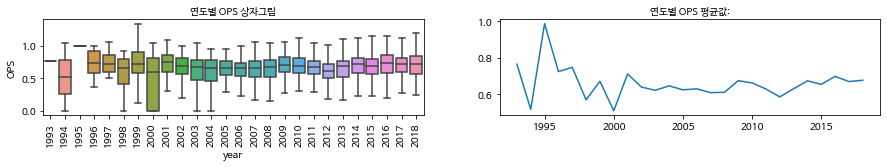

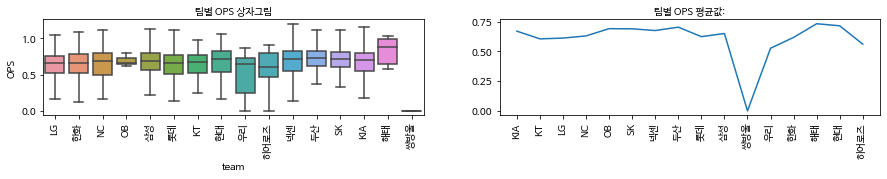

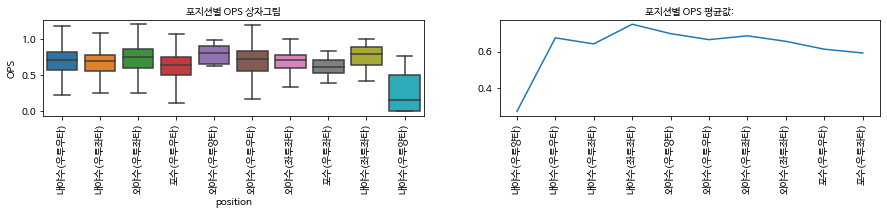

In [7]:
# 정규시즌
plt.figure(figsize=(15,6))
plt.subplot(3,2,1) 
g= sns.boxplot(x='year', y='OPS', data=regular, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,2)
plt.plot(regular.groupby('year')['OPS'].mean()) 
plt.title('연도별 OPS 평균값:', size=10)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(3,2,3) 
g = sns.boxplot(x='team', y='OPS', data=regular, showfliers=False)
g.set_title('팀별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,4)
plt.plot(regular.groupby('team')['OPS'].mean()) 
plt.title('팀별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(3,2,5) 
g = sns.boxplot(x='position', y='OPS', data=regular, showfliers=False)
g.set_title('포지션별 OPS 상자그림', size=10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(3,2,6)
plt.plot(regular.groupby('position')['OPS'].mean()) 
plt.title('포지션별 OPS 평균값:', size=10)
plt.xticks(rotation=90)
plt.show()

In [22]:
regular["team"].value_counts()

한화      302
롯데      298
LG      294
두산      282
삼성      280
SK      254
KIA     254
넥센      172
NC      131
KT       85
현대       60
우리       13
히어로즈     13
해태       12
OB        3
쌍방울       1
Name: team, dtype: int64

In [24]:
preseason['team'].value_counts()

두산      186
LG      174
SK      169
롯데      166
삼성      149
KIA     132
한화      131
넥센      112
NC       88
KT       57
현대       18
우리        6
히어로즈      5
Name: team, dtype: int64

In [25]:
print("프리", preseason['team'].unique())
print("정규", regular['team'].unique())

프리 ['LG' '한화' 'NC' '넥센' '롯데' '삼성' 'KT' 'SK' 'KIA' '두산' '히어로즈' '우리' '현대']
정규 ['LG' '한화' 'NC' 'OB' '삼성' '롯데' 'KT' '현대' '우리' '히어로즈' '넥센' '두산' 'SK' 'KIA'
 '해태' '쌍방울']


- 쌍방울 > SK, OB > 두산 , 해태 > 기아, 우리 및 서울 히어로즈 > 넥센
- 팀 획일화 필요: 팀의 전신도 동일한 팀으로 취급

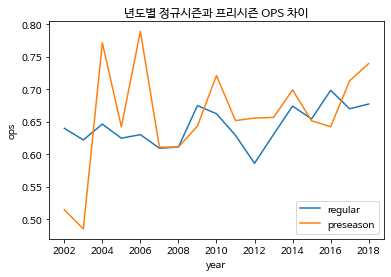

In [28]:
regular_ops = regular.groupby('year')['OPS'].mean()
preseason_ops = preseason.groupby('year')['OPS'].mean()
ops_df = pd.concat([regular_ops, preseason_ops],axis=1)[9:]

plt.plot(ops_df)
plt.title('년도별 정규시즌과 프리시즌 OPS 차이')
plt.xlabel('year')
plt.ylabel('ops')
plt.legend(['regular', 'preseason'], loc=4)
plt.show()

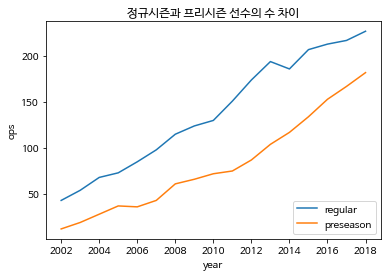

In [29]:
regular_cnt = regular.groupby('year')['batter_name'].count()
preseason_cnt = preseason.groupby('year')['batter_name'].count()
ops_cnt = pd.concat([regular_cnt, preseason_cnt],axis=1)[9:]

plt.plot(ops_cnt)
plt.title('정규시즌과 프리시즌 선수의 수 차이')
plt.xlabel('year')
plt.ylabel('ops')
plt.legend(['regular', 'preseason'], loc=4)
plt.show()

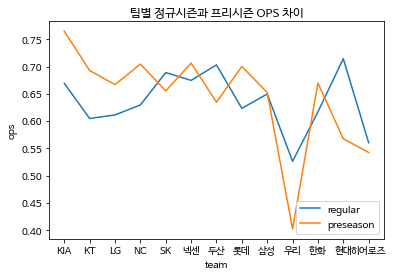

In [30]:
regular_Tops = regular.groupby('team')['OPS'].mean()
preseason_Tops = preseason.groupby('team')['OPS'].mean()
Tops_df = pd.concat([regular_Tops, preseason_Tops],axis=1).dropna(axis=0)

plt.plot(Tops_df)
plt.title('팀별 정규시즌과 프리시즌 OPS 차이')
plt.xlabel('team')
plt.ylabel('ops')
plt.legend(['regular', 'preseason'], loc=4)
plt.show()

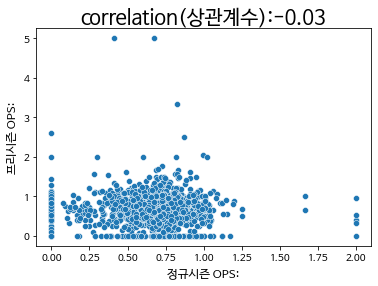

In [9]:
correlation=regular["OPS"].corr(preseason["OPS"])
sns.scatterplot(regular["OPS"], preseason["OPS"])
plt.title('correlation(상관계수):'+str(np.round(correlation,2)), fontsize=20)
plt.xlabel('정규시즌 OPS:', fontsize=12)
plt.ylabel('프리시즌 OPS:', fontsize=12)
plt.show()

- 정규시즌과 프리시즌은 상관관계가 보이지 않는다


In [21]:
regular["team"].value_counts()

한화      302
롯데      298
LG      294
두산      282
삼성      280
SK      254
KIA     254
넥센      172
NC      131
KT       85
현대       60
우리       13
히어로즈     13
해태       12
OB        3
쌍방울       1
Name: team, dtype: int64

In [43]:
regular.dropna(inplace=True)

In [44]:
# 년도 별 평균
year_mean = regular.groupby("year")["avg"].mean()
obp_mean = regular.groupby("year")["OBP"].mean()[2:]
slg_mean = regular.groupby("year")["SLG"].mean()[2:]

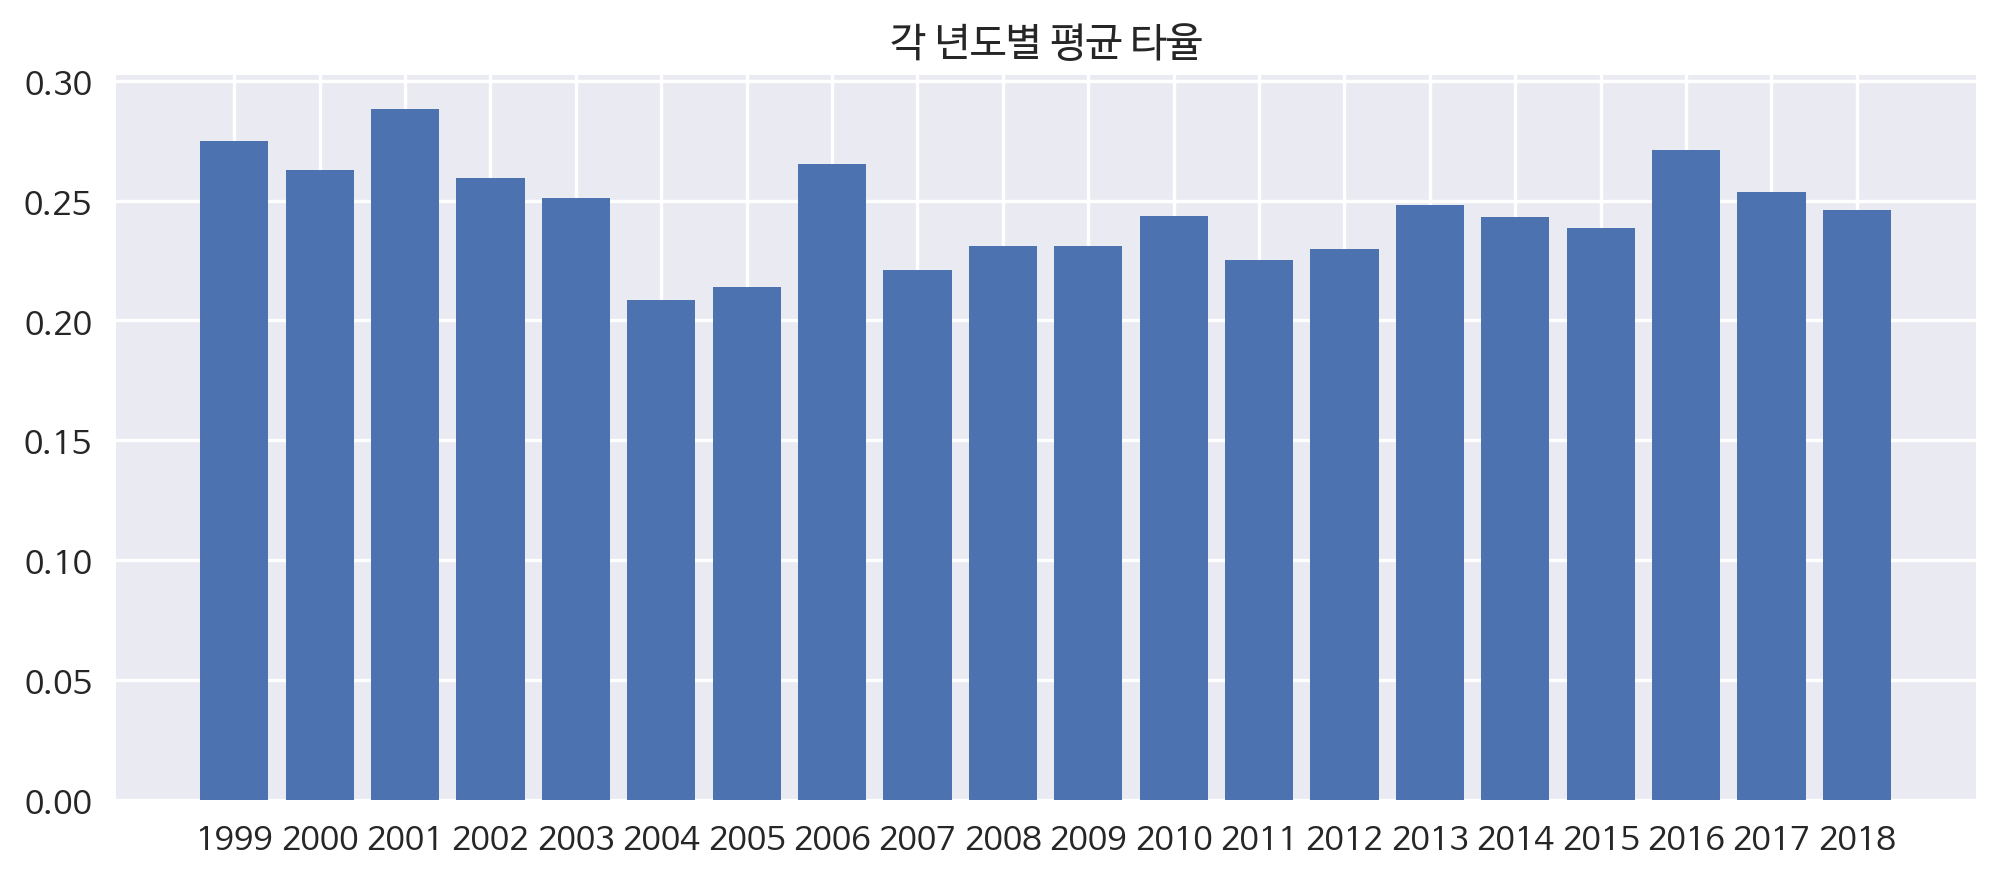

In [45]:
plt.figure(figsize=(10, 4))
plt.bar(x = year_mean.index, height = year_mean.values)
plt.xticks(range(1999, 2019, 1))

plt.title("각 년도별 평균 타율")
plt.show()

- 2004년: 투고타저 / 1999년: 타고투저


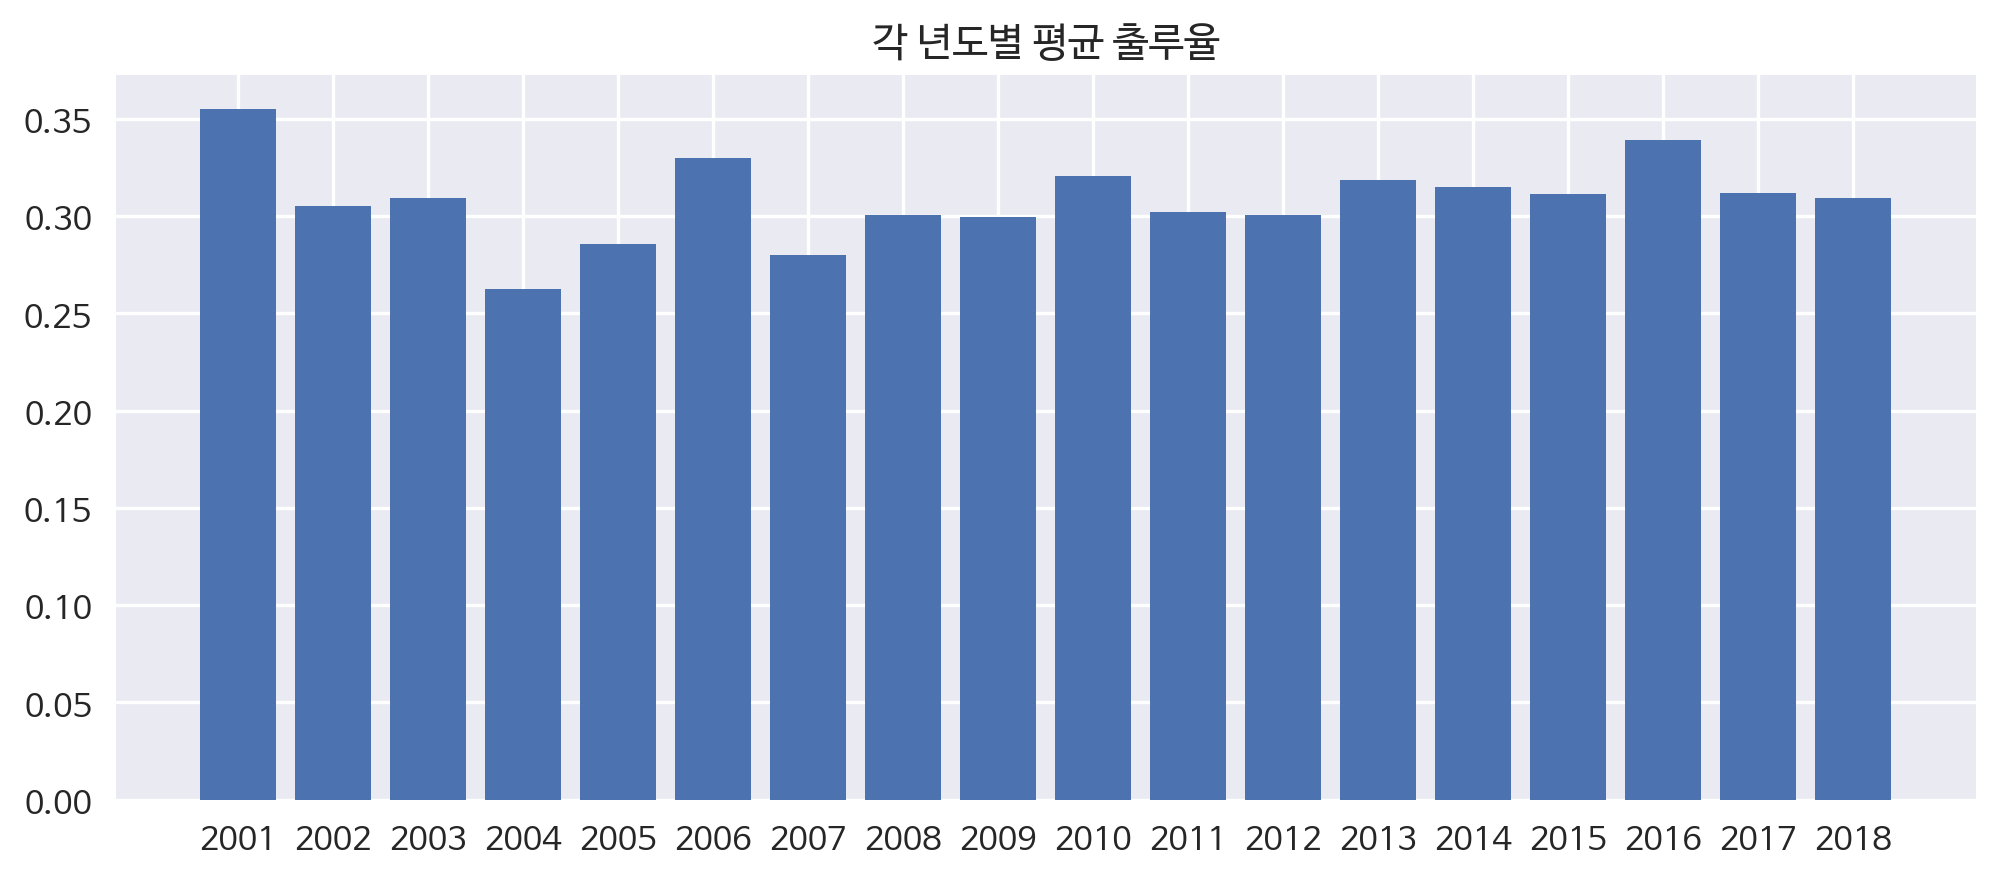

In [48]:
plt.figure(figsize=(10, 4))
plt.bar(x = obp_mean.index, height = obp_mean.values)
plt.xticks(range(2001, 2019, 1))

plt.title("각 년도별 평균 출루율")

plt.show()

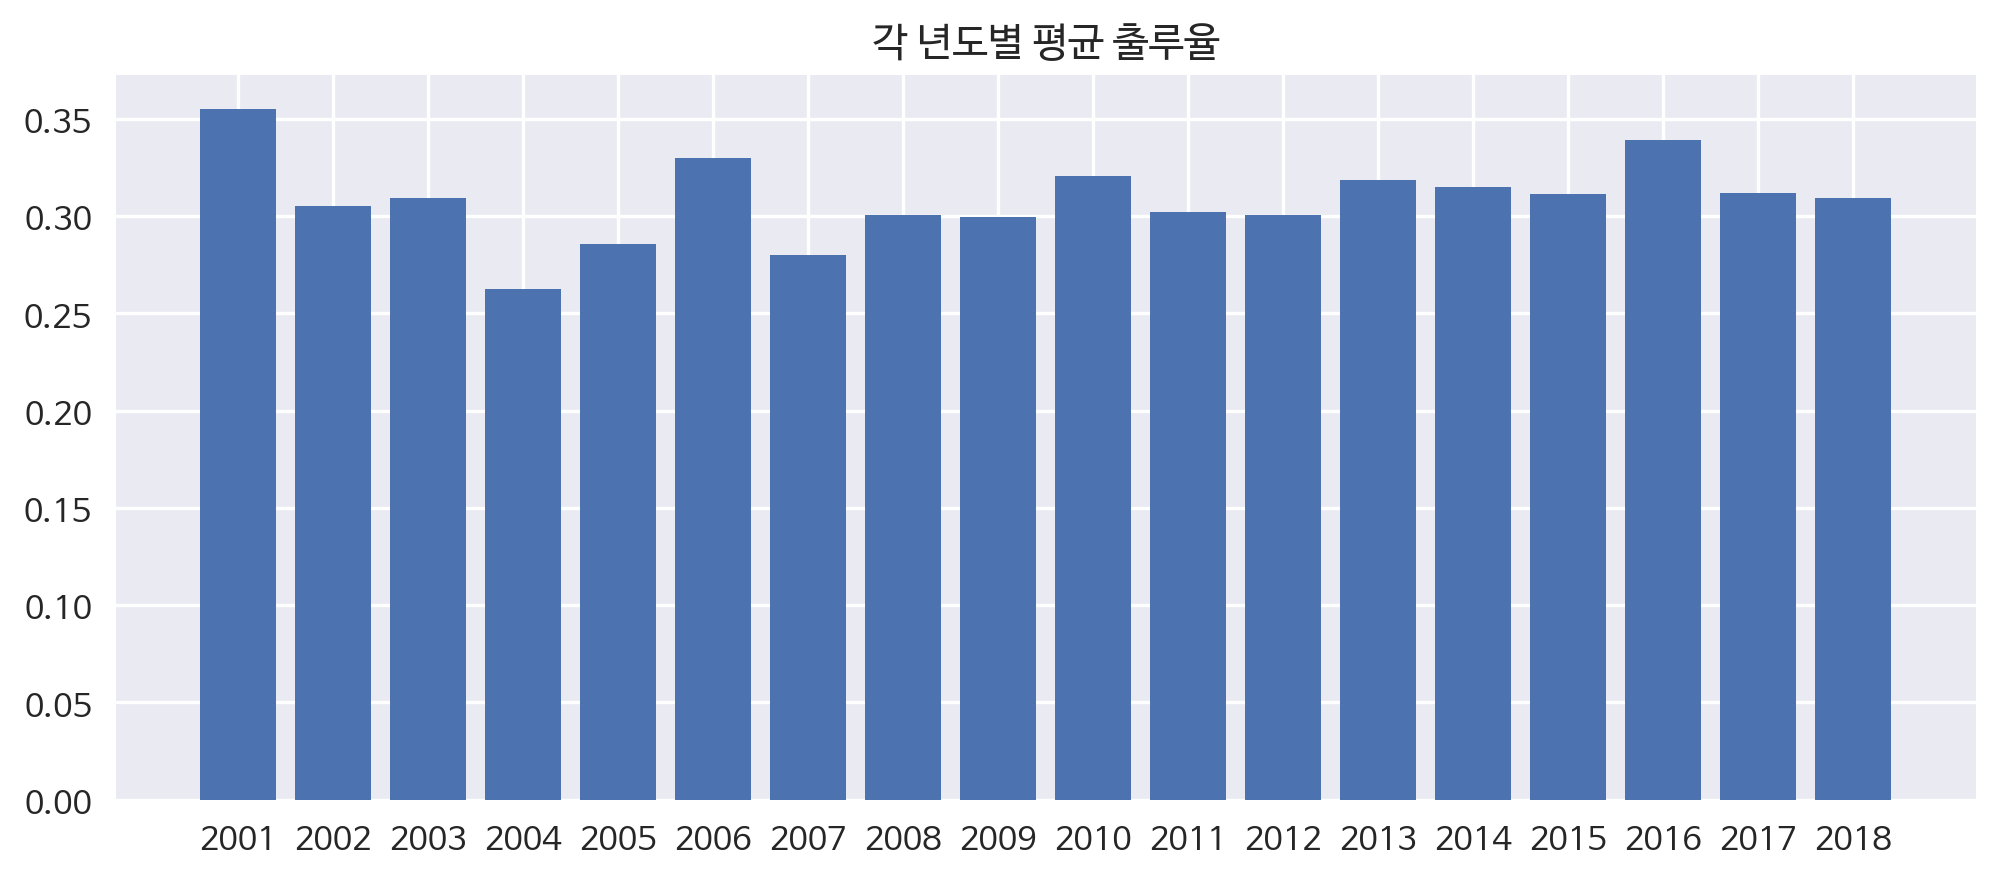

In [47]:
plt.figure(figsize=(10, 4))
plt.bar(x = slg_mean.index, height = slg_mean.values)
plt.xticks(range(2001, 2019, 1))

plt.title("각 년도별 평균 장타율")

plt.show()

<AxesSubplot:>

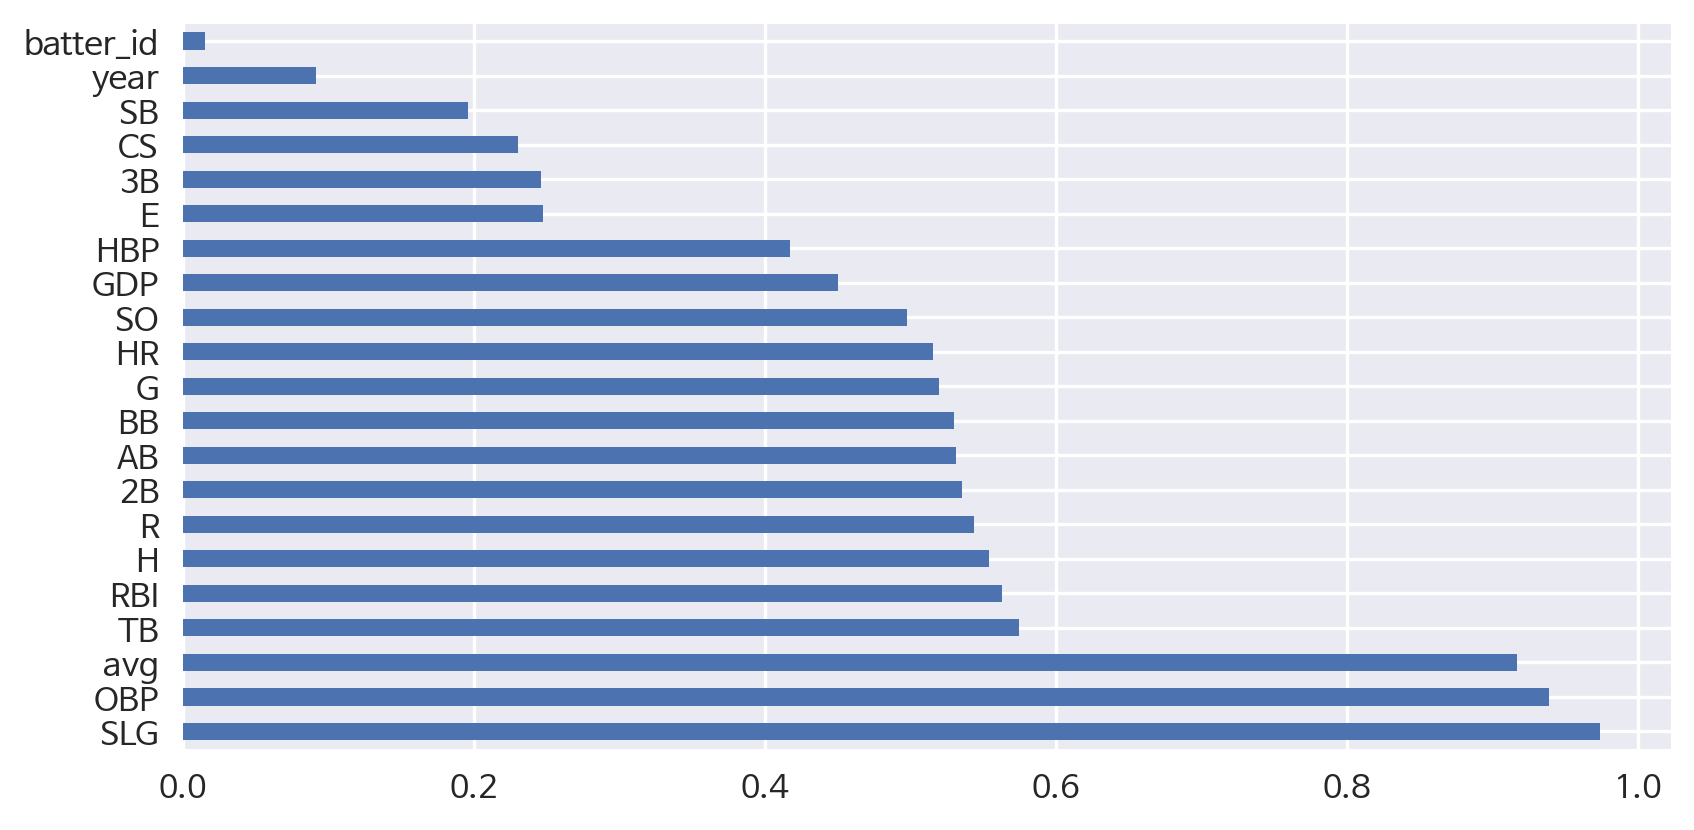

In [49]:
abs(regular.corr().loc["OPS"]).sort_values(ascending=False)[1:].plot(kind = "barh")

- ops와 상관관계 높은 변수: 출류율, 장타율
- ops와 상관관계 낮은 변수: 도루 실패, 몸무게, 외국인 여부

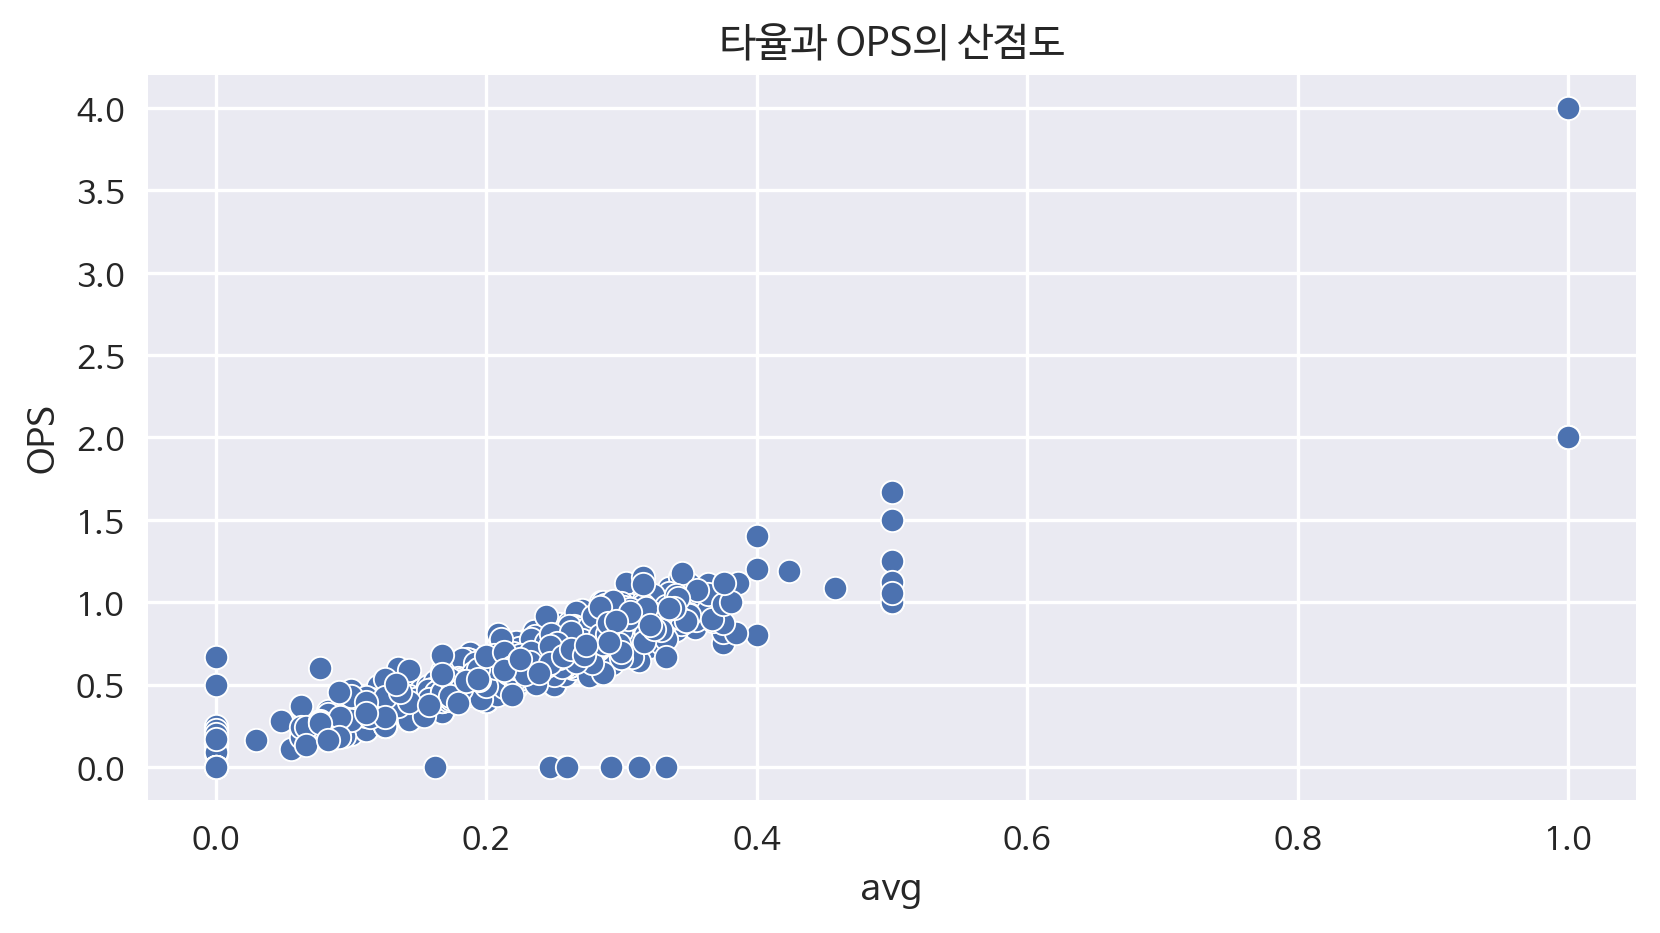

In [50]:
plt.figure()
sns.scatterplot(x = "avg", y = "OPS", data=regular)

plt.title("타율과 OPS의 산점도")
plt.show()

- 타율이 1.0(10할)이면서 OPS가 2.0 혹은 4.0인 데이터들이 있음
- 현실적으로 타율이 10할은 불가능하고 심지어 타율이 4할만 넘어가도 이상치라고 생각할 수 있음


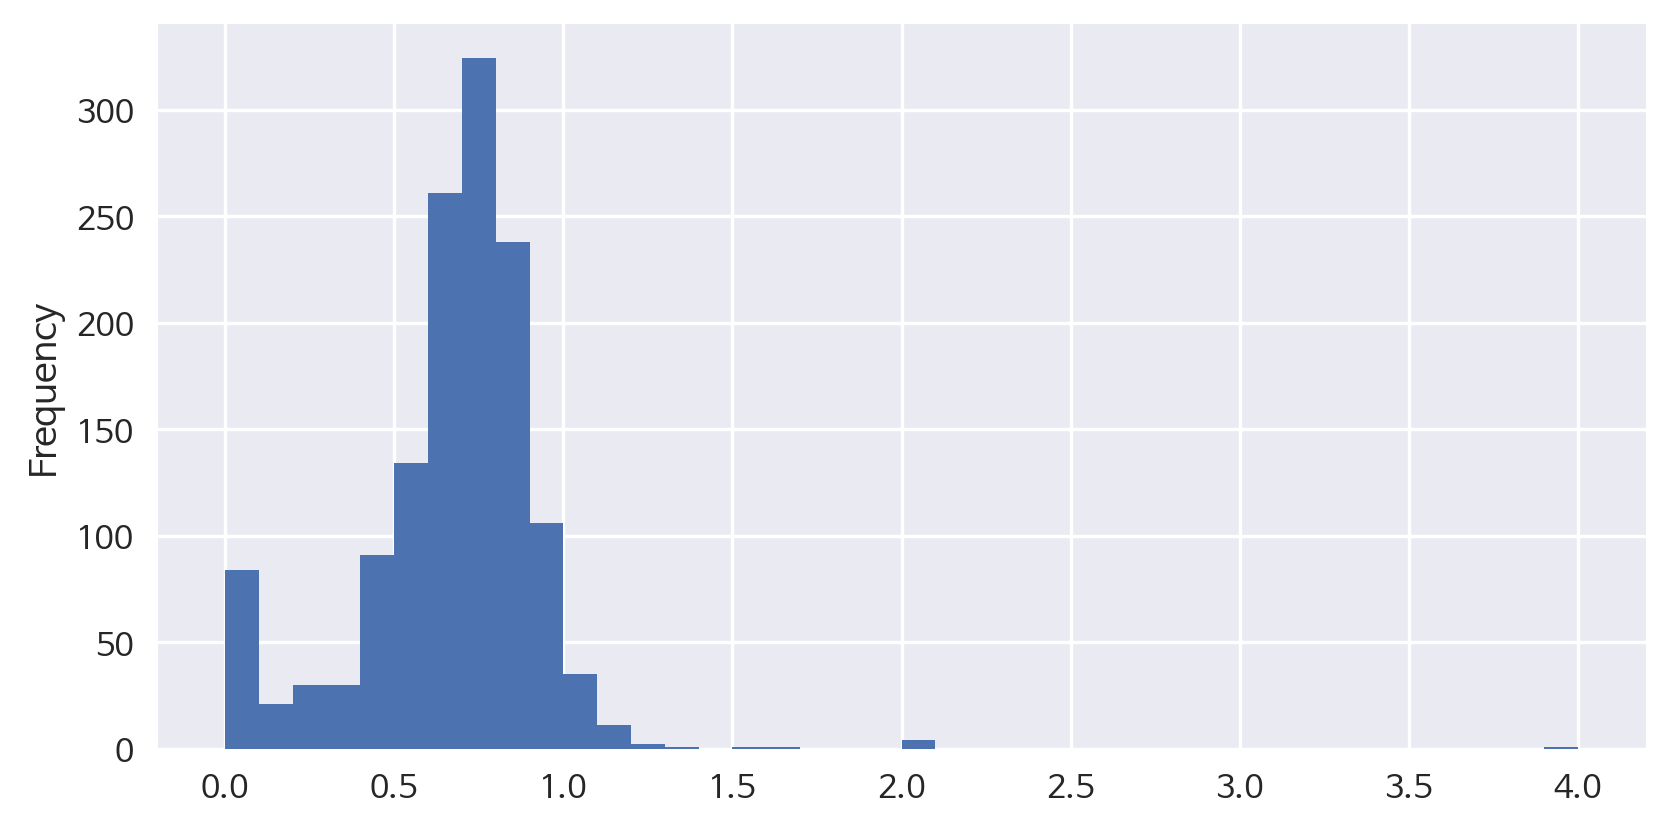

In [53]:
regular["OPS"].plot(kind="hist", bins=40)
plt.show()

<AxesSubplot:ylabel='Frequency'>

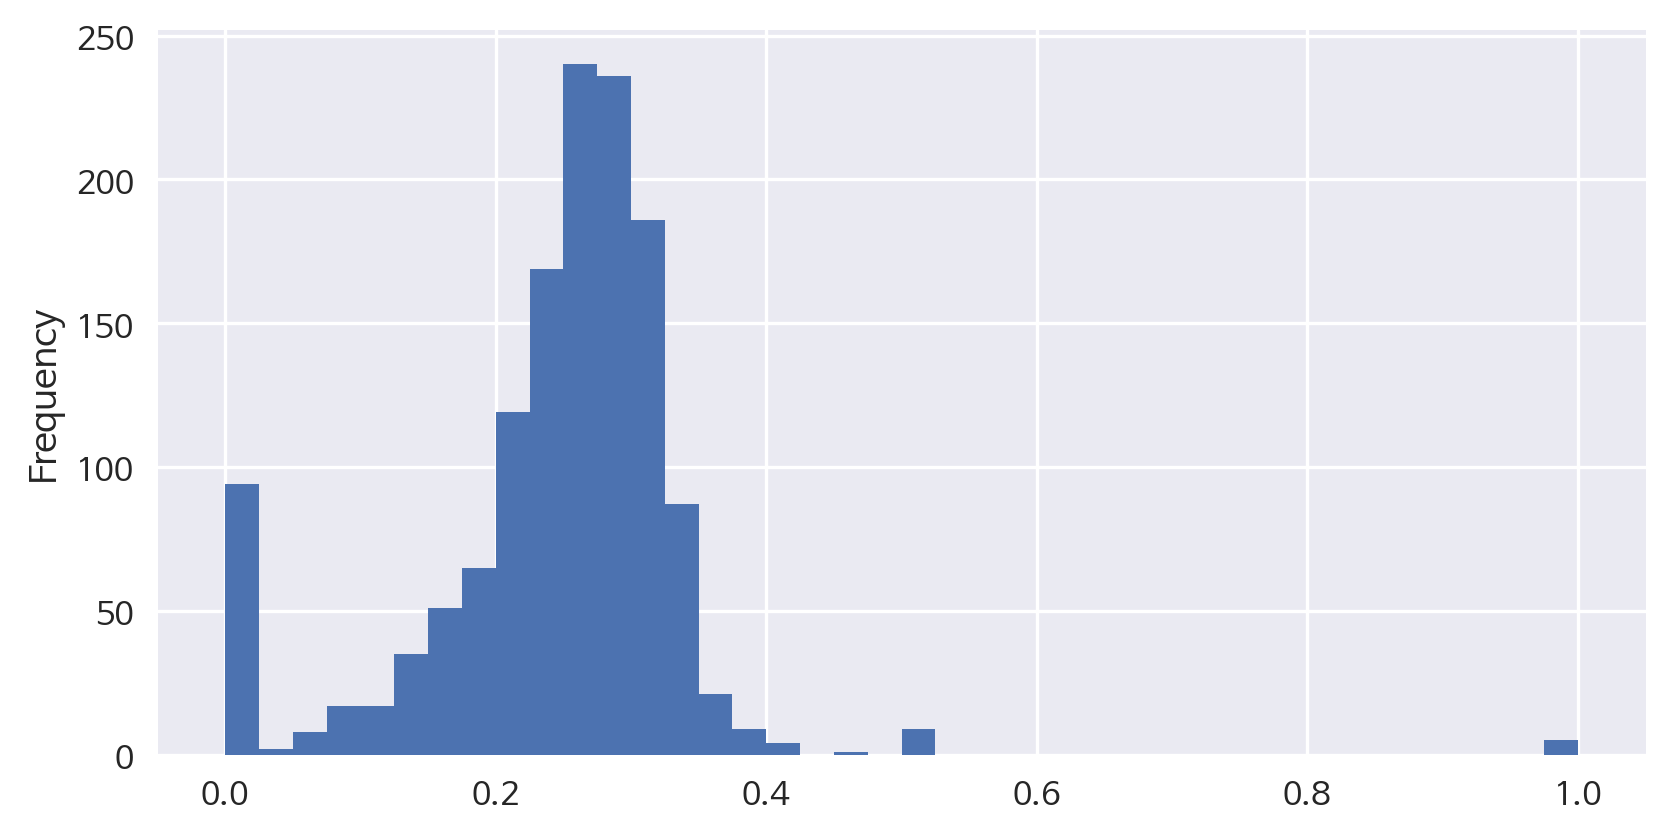

In [55]:
regular["avg"].plot(kind="hist", bins=40)

<AxesSubplot:>

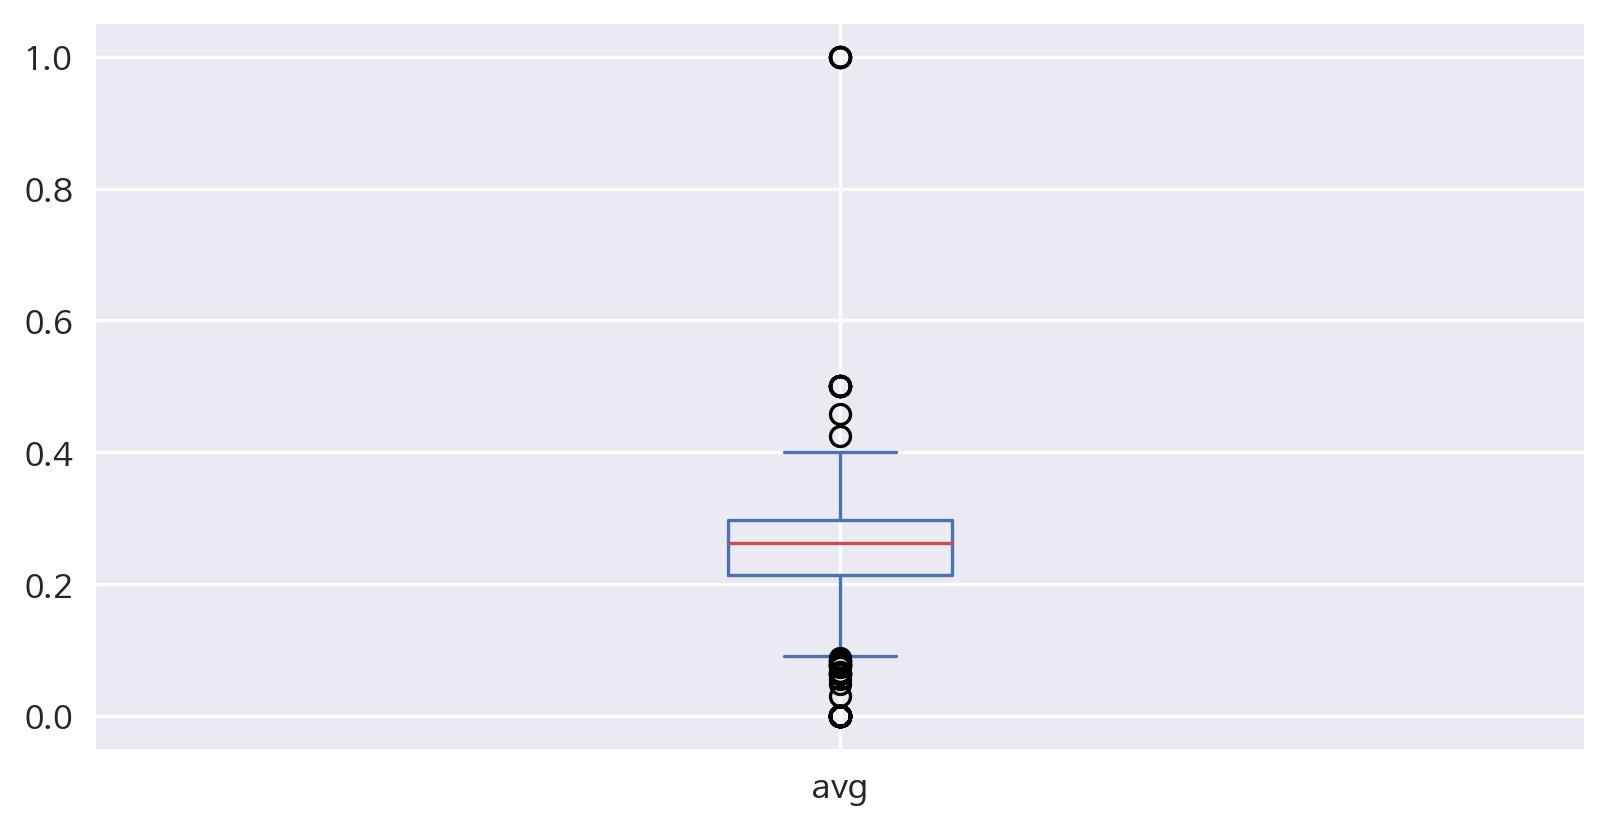

In [57]:
regular["avg"].plot(kind="box")

- 이상치 제거 필요